In [66]:
import os
print(os.getcwd())

c:\Users\New User\Documents\GitHub\text_to_discocirc\notebooks


In [67]:
from lambeq import BobcatParser

In [68]:
parser = BobcatParser(verbose='suppress')

### Example: "Alice loves Bob"
s-type expansion

In [69]:
ccg_tree = parser.sentence2tree("Alice loves Bob")
print(ccg_tree.deriv())

Alice   loves   Bob
═════  ═══════  ═══
  n    (s\n)/n   n 
──<U>           <U>
  n              n 
       ───────────>
           s\n     
──────────────────<
         s         


In [70]:
from discocirc.expr.ccg_to_expr import ccg_to_expr

In [71]:
expr1 = ccg_to_expr(ccg_tree)
expr1

    loves      Bob       
═════════════  ═══       
(n → (n → s))   n   Alice
──────────────────  ═════
     (n → s)          n  
─────────────────────────
            s            

In [72]:
from discocirc.expr.to_discopy_diagram import expr_to_diag

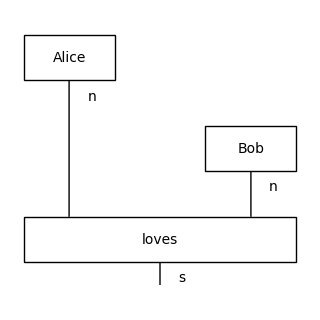

In [73]:
expr_to_diag(expr1).draw(figsize=(3,3))

In [74]:
from discocirc.expr.s_type_expand import s_type_expand

In [75]:
expr2 = s_type_expand(expr1)
expr2

      loves        Bob       
═════════════════  ═══       
(n → (n → n @ n))   n   Alice
──────────────────────  ═════
     (n → n @ n)          n  
─────────────────────────────
            n @ n            

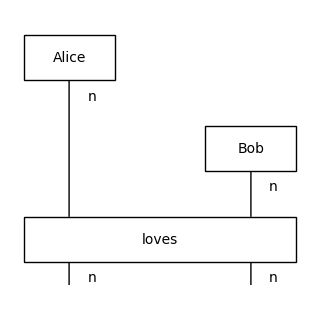

In [76]:
expr_to_diag(expr2).draw(figsize=(3,3))

### Example: "Alice quickly ran"
decomposing frames

In [77]:
ccg_tree = parser.sentence2tree("Alice quickly ran")
print(ccg_tree.deriv())

Alice    quickly    ran
═════  ═══════════  ═══
  n    (s\n)/(s\n)  s\n
──<U>  ───────────────>
  n          s\n       
──────────────────────<
           s           


In [78]:
expr1 = ccg_to_expr(ccg_tree)
expr1

      quickly          ran         
═══════════════════  ═══════       
((n → s) → (n → s))  (n → s)  Alice
────────────────────────────  ═════
          (n → s)               n  
───────────────────────────────────
                 s                 

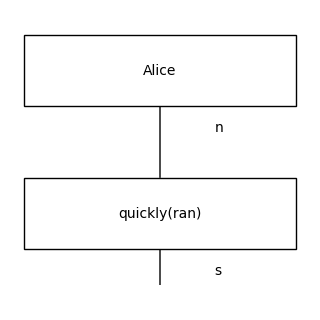

In [79]:
expr_to_diag(expr1).draw(figsize=(3,3))

The above diagram contains a frame ("quickly"), which takes in a gate ("ran") as an argument. To draw this in a more intuitive manner, we import the frame decompose functor

In [81]:
from discocirc.diag.frame import Frame
decompose_functor = Frame.get_decompose_functor()

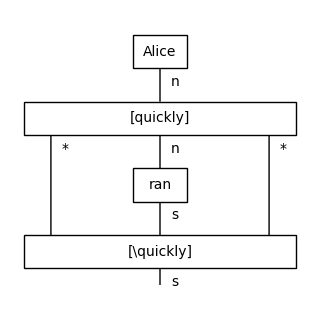

In [82]:
decompose_functor(expr_to_diag(expr1)).draw(figsize=(3,3))

In [83]:
expr2 = s_type_expand(expr1)
expr2

      quickly          ran         
═══════════════════  ═══════       
((n → n) → (n → n))  (n → n)  Alice
────────────────────────────  ═════
          (n → n)               n  
───────────────────────────────────
                 n                 

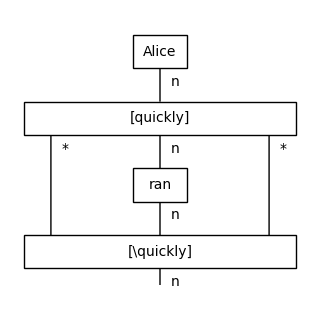

In [84]:
decompose_functor(expr_to_diag(expr2)).draw(figsize=(3,3))

### Example: "I really like Bob"
pulling out of frames

In [85]:
ccg_tree = parser.sentence2tree("I really like Bob")
expr1 = ccg_to_expr(ccg_tree)

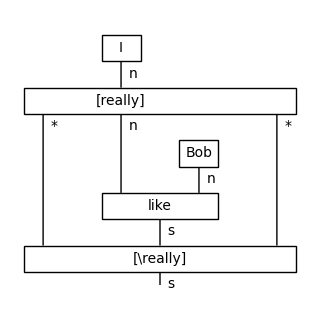

In [86]:
decompose_functor(expr_to_diag(expr1)).draw(figsize=(3,3))

The state "Bob" is trapped inside the frame. We need to 'pull it out' to the top, so that the "Bob" wire can compose at the top with other circuits

In [87]:
from discocirc.expr.pull_out import pull_out

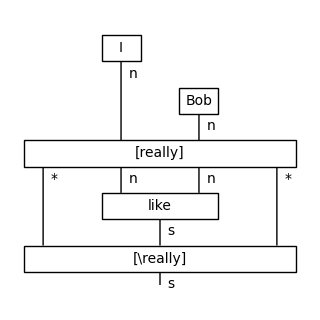

In [88]:
expr2 = pull_out(expr1)
decompose_functor(expr_to_diag(expr2)).draw(figsize=(3,3))

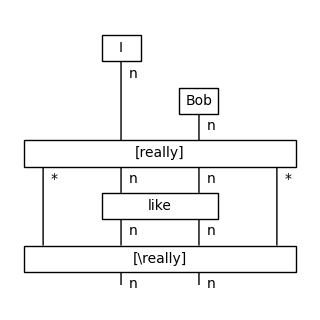

In [89]:
expr3 = s_type_expand(expr2)
decompose_functor(expr_to_diag(expr3)).draw(figsize=(3,3))

### TODO: inverse beta pulling out

In [ ]:
from discocirc.expr.inverse_beta import inverse_beta

### Example: "Bob who loves Alice runs"
n-type expansion, grammatical head

In [90]:
ccg_tree = parser.sentence2tree("Bob who loves Alice runs")
expr1 = ccg_to_expr(ccg_tree)

In [91]:
expr1

                                  loves      Alice     
                              ═════════════  ═════     
                 who          (n → (n → s))    n       
         ═══════════════════  ────────────────────     
         ((n → s) → (n → n))        (n → s)         Bob
         ─────────────────────────────────────────  ═══
 runs                     (n → n)                    n 
═══════  ──────────────────────────────────────────────
(n → s)                        n                       
───────────────────────────────────────────────────────
                           s                           

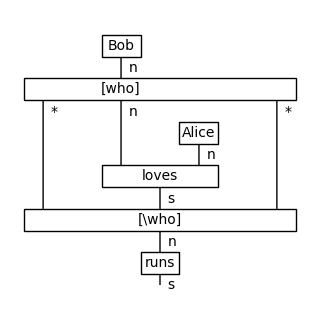

In [92]:
decompose_functor(expr_to_diag(expr1)).draw(figsize=(3,3))

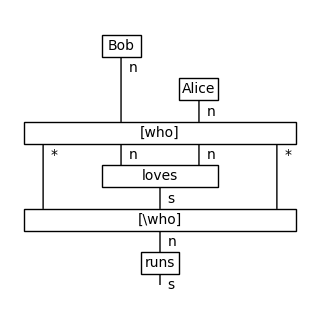

In [93]:
expr2 = pull_out(expr1)
decompose_functor(expr_to_diag(expr2)).draw(figsize=(3,3))

This is an interesting situation. "Bob who loves Alice" is treated as a single noun phrase which has the head "Bob". Diagrammatically, this corresponds to a single n-type wire.

Below, we show what happens if we just naively apply s-type expansion to the diagram.

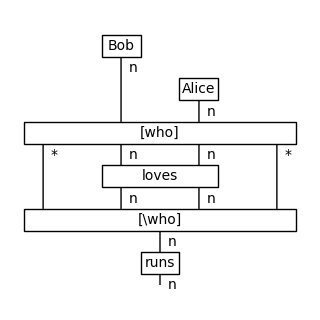

In [94]:
expr3 = s_type_expand(expr2)
decompose_functor(expr_to_diag(expr3)).draw(figsize=(3,3))

This is no good. We have two nouns at the top but only one at the bottom (which can be interpreted as representing "Bob"). Ideally we would also like to be able to access "Alice" as an outgoing wire. So, we need to expand the n-type wire of "Bob who loves Alice" into two n-type wires -- one representing "Bob" and one representing "Alice". 

Note also that as per the sentence "Bob who loves Alice runs", only "Bob" is doing the running, not "Alice". So after we expand the n-type wire into two, we need to ensure only the one corresponding to head grammatical head "Bob" is fed into "runs".

In [95]:
from discocirc.expr.n_type_expand import n_type_expand

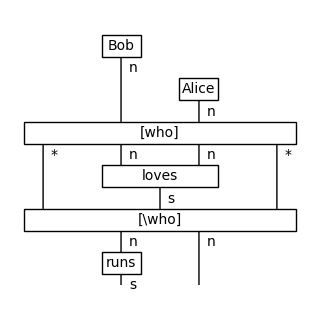

In [96]:
expr4 = n_type_expand(expr2)
decompose_functor(expr_to_diag(expr4)).draw(figsize=(3,3))

This is much better. After performing this n-type expansion, we can do the s-type expansion as usual

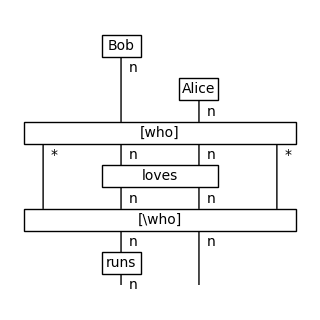

In [97]:
expr5 = s_type_expand(expr4)
decompose_functor(expr_to_diag(expr5)).draw(figsize=(3,3))

### TODO: coordination-of-nouns expansion

### Example: complicated sentence

In [ ]:
expr = ccg_to_expr(parser.sentence2tree("In the graphical calculus of planar string diagrams , equality is generated by exchange moves , which swap the heights of adjacent vertices."))
decompose_functor(expr_to_diag(s_type_expand(n_type_expand(pull_out(inverse_beta(expr)))))).draw(figsize=(10,10))

### Example: intra-language independence
Two ways of saying the same thing, with different phrasal ordering, become the same circuit

A simple example, where going from biclosed to closed yields language independence

In [98]:
ccg_tree = parser.sentence2tree("Alice quickly ran")
print(ccg_tree.deriv())
expr = ccg_to_expr(ccg_tree)
expr

Alice    quickly    ran
═════  ═══════════  ═══
  n    (s\n)/(s\n)  s\n
──<U>  ───────────────>
  n          s\n       
──────────────────────<
           s           


      quickly          ran         
═══════════════════  ═══════       
((n → s) → (n → s))  (n → s)  Alice
────────────────────────────  ═════
          (n → s)               n  
───────────────────────────────────
                 s                 

In [99]:
ccg_tree = parser.sentence2tree("Alice ran quickly")
print(ccg_tree.deriv())
expr = ccg_to_expr(ccg_tree)
expr

Alice  ran    quickly  
═════  ═══  ═══════════
  n    s\n  (s\n)\(s\n)
──<U>  ───────────────<
  n          s\n       
──────────────────────<
           s           


      quickly          ran         
═══════════════════  ═══════       
((n → s) → (n → s))  (n → s)  Alice
────────────────────────────  ═════
          (n → s)               n  
───────────────────────────────────
                 s                 

A more complex example, where the pulling out procedure makes it language independent

In [100]:
ccg_tree = parser.sentence2tree("Before looking around , he saw the letter")

Below is the diagram corresponding to the raw expression obtained from the CCG parse

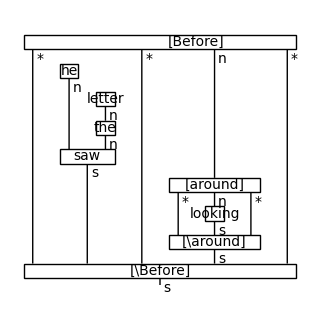

In [101]:
decompose_functor(expr_to_diag(ccg_to_expr(ccg_tree))).draw(figsize=(3,3))

And here is what it looks like after we perform our operations to it

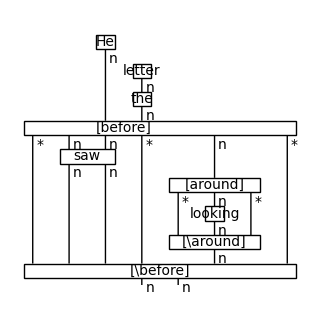

In [104]:
decompose_functor(expr_to_diag(s_type_expand(pull_out(ccg_to_expr(ccg_tree))))).draw(figsize=(3,3))

Here is another sentence, that says essentially the same thing but in a different way

In [102]:
ccg_tree = parser.sentence2tree("He saw the letter before looking around")

Again, here is the diagram corresponding to the raw CCG parse. As you can see, it is different to the diagram for the CCG parse of the previous sentence

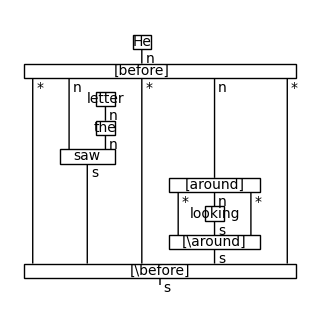

In [103]:
decompose_functor(expr_to_diag(ccg_to_expr(ccg_tree))).draw(figsize=(3,3))

However, after we perform our operations to it, the resulting diagram now looks the same as the one obtained from the previous sentence!

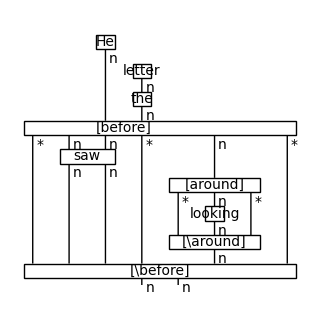

In [105]:
decompose_functor(expr_to_diag(s_type_expand(pull_out(ccg_to_expr(ccg_tree))))).draw(figsize=(3,3))

### Example: multiple sentences, bAbI task example

In [106]:
from discocirc.pipeline.text_to_circuit import sentence_list_to_circuit

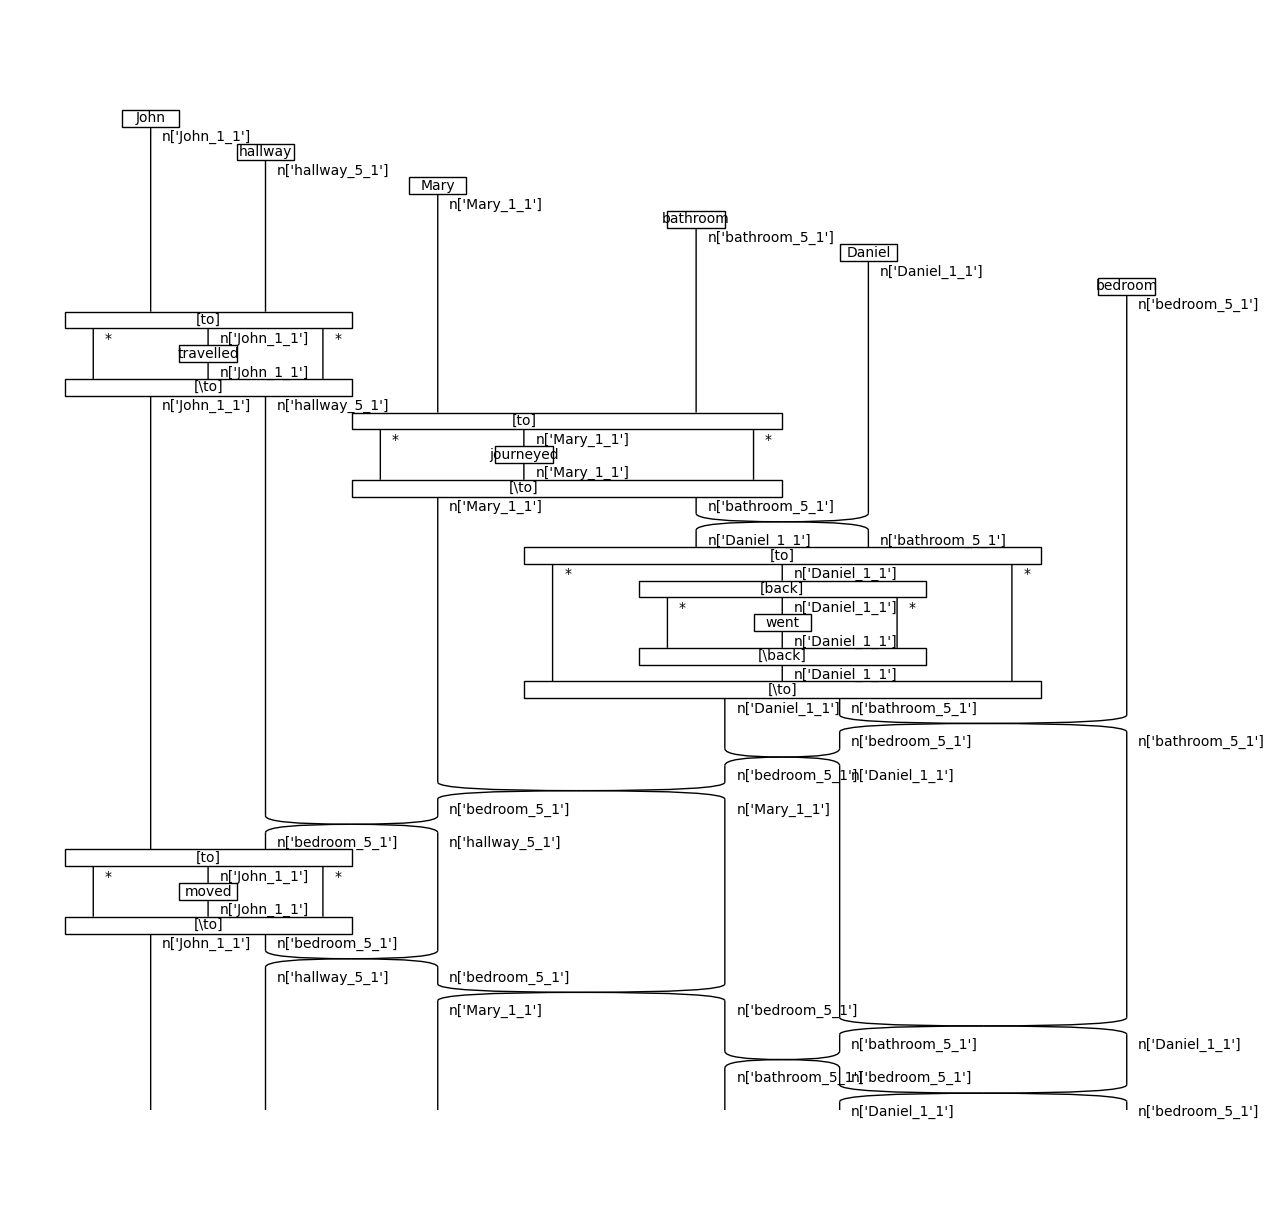

In [107]:
from discocirc.pipeline.text_to_circuit import text_to_circuit


text_circ = text_to_circuit("John travelled to the hallway. Mary journeyed to the bathroom. Daniel went back to the bathroom. John moved to the bedroom.")
text_circ.draw(figsize=(12,12))

# sentence_list_to_circuit(["John travelled to the hallway",
#                  "Mary journeyed to the bathroom",
#                  "Daniel went back to the bathroom",
#                  "John moved to the bedroom"]).draw(figsize=(12,12))

Sentence w causality issue

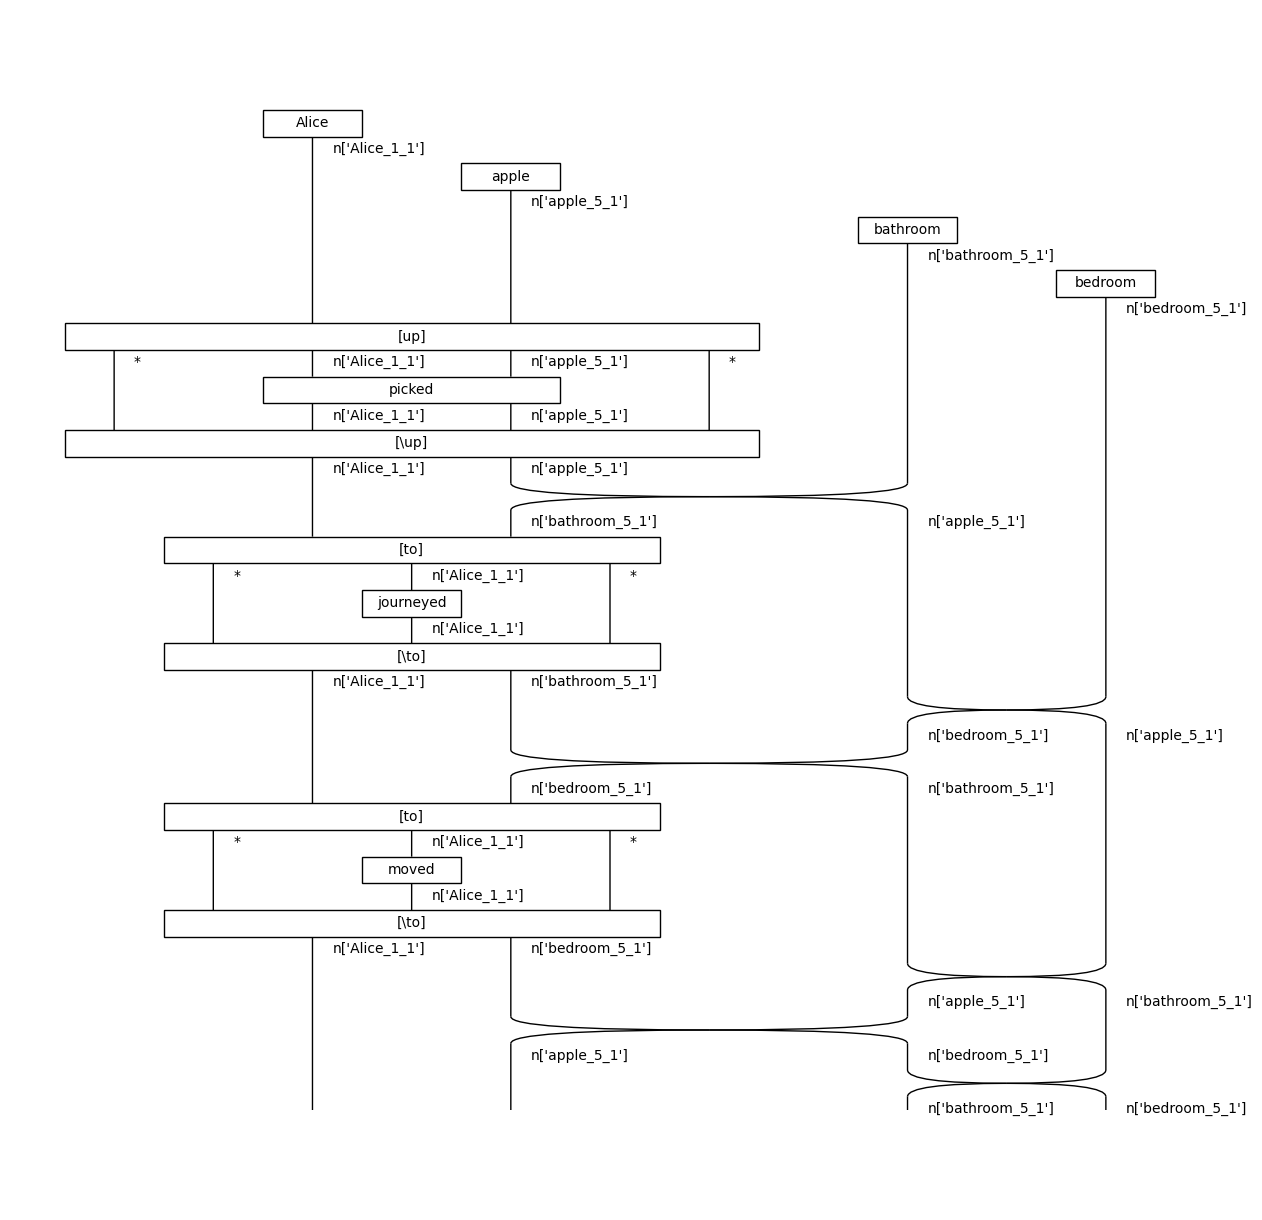

In [108]:
text_circ = text_to_circuit("Alice picked up the apple. Alice journeyed to the bathroom. Alice moved to the bedroom.")
text_circ.draw(figsize=(12,12))
